In [96]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import io, stats, spatial
from fooof import FOOOFGroup

sys.path.append('../')
import utils

font = {'family' : 'Tahoma',
        'weight' : 'regular',
        'size'   : 12}

import matplotlib
matplotlib.rc('font', **font)
C_ORD = plt.rcParams['axes.prop_cycle'].by_key()['color']

save_plot = True
fig_path = '../figures/mni/%s.pdf'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# # load the data variables
# basepath = '/Users/rdgao/Documents/data/MNI_rest/'
# datafile = basepath + 'WakefulnessMatlabFile.mat'
# result_basepath = '/Users/rdgao/Documents/code/research/field-echos/results/MNI_rest/'
# data_dict = io.loadmat(datafile, squeeze_me = True)
# region_labels = pd.read_csv(basepath+'/WakefulnessInformation/RegionInformation.csv')
# patient_info = pd.read_csv(basepath+'/WakefulnessInformation/PatientInformation.csv', index_col=0)
# patient_info.columns=['gender', 'age']
# region_labels['Region name']=[rl[1:-1] for rl in region_labels['Region name']]
# print(data_dict.keys())

dict_keys(['__header__', '__version__', '__globals__', 'AgeAtTimeOfStudy', 'ChannelName', 'ChannelPosition', 'ChannelRegion', 'ChannelType', 'Data', 'FacesLeft', 'FacesRight', 'Gender', 'Hemisphere', 'NodesLeft', 'NodesLeftInflated', 'NodesRegionLeft', 'NodesRegionRight', 'NodesRight', 'NodesRightInflated', 'Patient', 'RegionName', 'SamplingFrequency'])


# Saving out PSD & fooof fit plots
### note: this takes a long time because it's generating and saving thousands of plots

In [3]:
# plot_fits = False
# if plot_fits: plt.figure(figsize=(5,5))

# for win_len in ['1sec', '5sec']:
#     for p_cur in ['psd_mean', 'psd_med']:
#         # construct channel metainfo and behavioral table
#         psd_data = np.load(result_basepath+'/psd/'+win_len+'/psds.npz')

#         # load fooof results
#         fooof_folder = result_basepath +'/psd/'+win_len+'/fooof/'+p_cur+'/'  
#         ff_list = [ff for ff in os.listdir(fooof_folder) if '.json' in ff]

#         # plot psds and fits
#         if plot_fits:
#             fit_fig_path = utils.makedir(fooof_folder, '/plts/', False)
#             f_axis = psd_data['f_axis']
#             psds = psd_data[p_cur].T
#             fg_labels = [f.split('.')[0][3:] for f in ff_list]
#             # grab fgs
#             fg_all=[]
#             for ff in ff_list:
#                 fg_dummy = FOOOFGroup()
#                 fg_dummy.load(fooof_folder+ff)
#                 fg_all.append(fg_dummy)
#             # plot
#             for chan in range(psds.shape[0]):
#                 utils.plot_psd_fits(f_axis, psds, chan, fg_all, fg_labels)
#                 plt.title('Channel: %i - Region: %i'%(chan, data_dict['ChannelRegion'][chan]))
#                 fig_name = '/chan%i_reg%i.png'%(chan, data_dict['ChannelRegion'][chan])
#                 plt.savefig(fit_fig_path+fig_name)
#                 plt.clf()

# Collect fooof fits and meta info
Note that x,y,z in MNI coord is L-R, P-A, I-S 

In [4]:
# win_len, p_cur = '1sec', 'psd_med'
# fooof_folder = result_basepath+'/psd/'+win_len+'/fooof/'+p_cur+'/'
# print(fooof_folder)
# ff_list = [ff for ff in os.listdir(fooof_folder) if '.json' in ff]
# print(ff_list)

# # return fooof fits and convert knee to tau
# fg_aps, fg_pks, fg_err, fg_r2s = utils.return_fg_fits(ff_list[1], fooof_folder)
# if fg_aps.shape[1]==3:
#     knee_freq, knee_tau = utils.convert_knee_val(fg_aps[:,1],fg_aps[:,2])
#     knee = fg_aps[:,1]
# else:
#     knee_tau = np.zeros_like(fg_aps[:,0])
#     knee = np.zeros_like(fg_aps[:,0])

# # create pandas df and throw everything in there
# e_type = np.array(data_dict['ChannelType'], 'c').view(np.uint8)-64.
# patient_info['gender'] = 0 if 'M' else 1
# df_info = np.vstack((data_dict['Patient'], 
#                      patient_info.loc[data_dict['Patient']][['gender', 'age']].values.astype(int).T, 
#                      e_type, 
#                      data_dict['ChannelPosition'].T, 
#                      data_dict['ChannelRegion'])
#                    ).T
# df_data = np.vstack((fg_aps[:,-1], knee, knee_tau, np.log10(knee_tau), fg_err, fg_r2s)).T
# df_combined = pd.DataFrame(np.hstack((df_info,df_data)),columns=['patient','gender','age','etype', 'x','y','z','region','exp', 'knee', 'tau','log_tau','err', 'r2'])

# # insert column for x_positive
# df_combined.insert(5, 'x_pos', np.abs(df_combined['x'].values))

# # insert lobe info
# df_combined.insert(8, 'lobe', 0)
# lobe_id = {val: ind for ind, val in enumerate(region_labels['Lobe'].unique())}
# for ind, region in enumerate(region_labels['Region #']):
#     df_combined.loc[df_combined['region']==region,'lobe'] = lobe_id[region_labels.loc[ind,'Lobe']]

# print(len(df_combined))

# # drop nans
# df_combined.dropna(inplace=True)
# df_combined.reset_index(inplace=True)

# # subsample by electrode type
# print(df_combined.groupby('etype').count()['patient'])
# print(df_combined[['exp','knee','tau','log_tau', 'err', 'r2']].corr('spearman'))
# print('%i patients.'%len(df_combined['patient'].unique()))

/Users/rdgao/Documents/code/research/field-echos/results/MNI_rest//psd/1sec/fooof/psd_med/
['fg_fixed_1pks_30-55Hz.json', 'fg_knee_2pks_1-55Hz.json', 'fg_fixed_2pks_1-55Hz.json', 'fg_fixed_1pks_1-10Hz.json']
1772
etype
1.0       65
4.0     1182
7.0      256
13.0     262
Name: patient, dtype: int64
              exp      knee       tau   log_tau       err        r2
exp      1.000000  0.967636 -0.830731 -0.830731  0.228590  0.112464
knee     0.967636  1.000000 -0.940439 -0.940439  0.257530 -0.026280
tau     -0.830731 -0.940439  1.000000  1.000000 -0.275740  0.212117
log_tau -0.830731 -0.940439  1.000000  1.000000 -0.275740  0.212117
err      0.228590  0.257530 -0.275740 -0.275740  1.000000 -0.765893
r2       0.112464 -0.026280  0.212117  0.212117 -0.765893  1.000000
106 patients.


../utils.py:59: RuntimeWarning: invalid value encountered in power
  knee_freq = knee**(1./exponent)


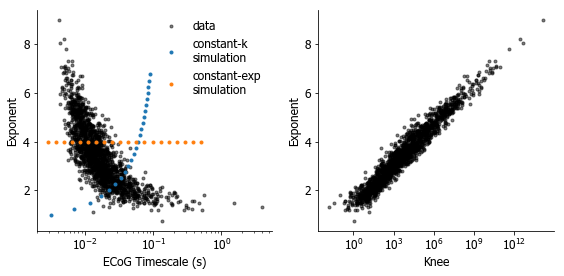

In [5]:
# plot tau-exp correlation
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.semilogx(df_combined['tau'],df_combined['exp'],'.k', alpha=0.5, label='data')
sim_exp = np.arange(1,7,0.25)
k_freq, k_tau = utils.convert_knee_val(knee=50., exponent=sim_exp)
plt.plot(k_tau, sim_exp, '.', label='constant-k\nsimulation')

sim_k,sim_exp = np.logspace(-2,7,20),4
k_freq, k_tau = utils.convert_knee_val(knee=sim_k, exponent=sim_exp)
plt.plot(k_tau, np.ones_like(k_tau)*sim_exp, '.', label='constant-exp\nsimulation')

plt.legend(frameon=False)
plt.xlabel('ECoG Timescale (s)'); plt.ylabel('Exponent'); utils.remove_spines(plt.gca())
# knee-exp
plt.subplot(1,2,2)
plt.semilogx(df_combined['knee'],df_combined['exp'],'.k', alpha=0.5)
plt.xlabel('Knee'); plt.ylabel('Exponent'); utils.remove_spines(plt.gca())
plt.tight_layout()
if save_plot: plt.savefig(fig_path%'mni_tau_exp')

One immediate note of interest: exponent and time constant are negatively correlated, which is the opposite of what we would expect if purely a product of the time constant formula, i.e. knee remains constant but exponent changes.

This means exponent and time constant are independently changing and in opposite directions, in other words, slope and knee are positively correlated.

Does this recapitulate the Murray finding? Need to match convert the "long timescale" finding to exponent in the autocorrelation simulation.

Higher exponent value means faster dropoff of power in high frequency, i.e. more dominant lower frequency (more "long-timescale" activity), so higher autocorrelation offset?

# Subject and Grand Average
First average over electrodes of the same region for each subject, then average over all subjects.

Can vary the plotted feature and the central tendency measure used. Error bars always denote 2xSEM.

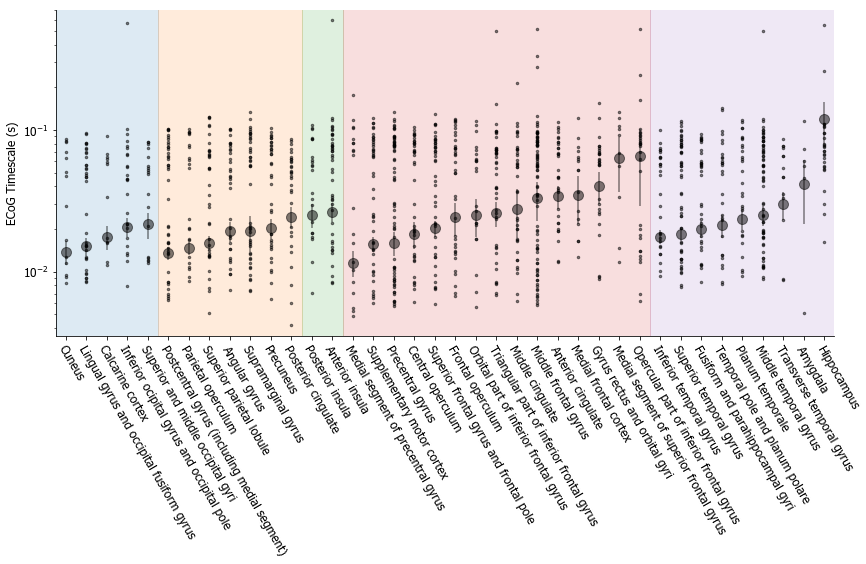

In [57]:
# functions to use for computing average and deviation
avg_dev_f = [np.mean, stats.sem]
patient_reg_agg = df_combined.groupby(['region', 'patient']).agg(avg_dev_f[0])
agg_avg, agg_dev = utils.compute_avg_dev(patient_reg_agg.groupby('region')['tau'], avg_dev_f)

plt.figure(figsize=(12,8))
utils.plot_agg_by_region(agg_avg, agg_dev, region_labels, patient_reg_agg, shade_by_lobe=True)
plt.ylim([0.0035, 0.7]); plt.ylabel('ECoG Timescale (s)');
if save_plot: plt.savefig(fig_path%'mni_tau_region',  bbox_inches='tight')

#### Interim conclusion: 
As far as time constants go, these results seem roughly consistent with the monkey results:
- the numbers themselves are in the range of monkey ecog results, i.e. between 10-100ms mostly, as opposed to 100-300ms of population spiking timescales
- frontal regions, especially mFC and ACC, have the longest fitted time constants.
- SMC and pre+postcentral gyrus (somatosensory areas) have the shortest time constants.
- temporal lobe, as a whole, have pretty long time constants. I would've expected at least a short-timescale region in primary auditory cortex, but maybe coverage there isn't good coverage there. Also I have no clue which of those regions correspond to A1.
- hippocampus has an extremely long time constant as a whole, as well as opercular part of IFG (brodmann 44).
- results are fairly consistent across different averaging functions
- did not look extensively across the different PSD estimate and fooof parameter configurations, but comparing 1sec and 5sec median fits seem to be pretty consistent

#### Problems:
- I have no idea where some of these regions are, maybe plot their average coordinates on a brain?
    - see next figure
    - Brad's idea is to plot tau as a function of distance (Euclidean, Haversine, cortical surface, etc.) from electrode to primary sensory/motor region of that lobe, e.g., V1, A1, S1. 
- electrode difference: the 4 types of electrodes may have different impedance spectra, so I should probably regress that out, or at least compare within electrodes
    - see below: general pattern is more or less the same for each electrode type, though coverage does differ
- not really sure what is the best function to use to average/visualize the time constants, because they're non-normally distributed
    - have options for nanmean, nanmedian, and geometric mean, all more or less the same (though scipy geometric mean is messed up because it doesn't account for nans

# Spatial Localization on Brain

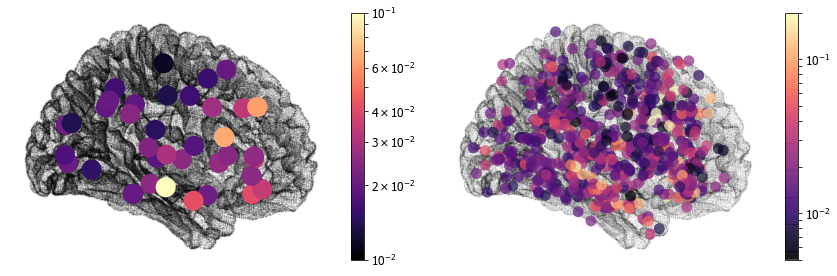

In [7]:
label_region = False
avg_coor = df_combined.groupby(['region']).agg(np.mean)[['x','y','z']]

plt.figure(figsize=(12,4))

# plot grand average
plt.subplot(1,2,1)
plt.scatter(data_dict['NodesLeft'][:,1],data_dict['NodesLeft'][:,2], s=1, c='k', alpha=0.1) # plot brain
plt.scatter(avg_coor['y'],avg_coor['z'], s=400, c=agg_avg, 
            norm=matplotlib.colors.LogNorm(), edgecolors='none', cmap='magma')

if label_region:
    for i,s in enumerate(region_labels['Region #']):
        plt.text(avg_coor['y'][i+1],avg_coor['z'][i+1], s, color='w', 
                 horizontalalignment='center', verticalalignment='center')
plt.clim([0.01,0.1])
plt.colorbar()
plt.xticks([]);plt.yticks([])
plt.box('off')

# plot regional average from each patients
plt.subplot(1,2,2)
plt.scatter(data_dict['NodesLeft'][:,1],data_dict['NodesLeft'][:,2], s=1, c='k', alpha=0.05)
plt.scatter(patient_reg_agg['y'],patient_reg_agg['z'], s=120, c=patient_reg_agg['tau'], 
            norm=matplotlib.colors.LogNorm(), edgecolors='none', cmap='magma', alpha=0.7)
plt.clim([0.005,0.2])
plt.colorbar()
plt.xticks([]);plt.yticks([])
plt.tight_layout()
plt.box('off')
#if save_plot: plt.savefig(fig_path%'mni_tau_brainmap',  bbox_inches='tight')

This visualization is not the best, since the averaged electrode coordinates are kinda just floating.

# Distance from primary area per lobe
To find MNI coordinates for the primary sensorimotor areas for each lobe (V1, A1, S1, M1), I started with [this chart][1] that is kinda off, so I visually confirmed in this [interactive viz][2], then checked in [neurosynth][3] to make sure the associated terms for each coordinate are indeed primary sensory. Finally, [Wikipedia of brodmann area][4].

Package for computing cortical surface distance: [paper][5] & [code][6].
[1]:http://www.ajnr.org/content/ajnr/suppl/2011/02/07/ajnr.A2330.DC1/2330_materials.pdf
[2]:http://sprout022.sprout.yale.edu/mni2tal/mni2tal.html
[3]:http://neurosynth.org/locations/?x=50&y=-24&z=56
[4]:https://en.wikipedia.org/wiki/Brodmann_area
[5]:https://academic.oup.com/gigascience/article/5/suppl_1/s13742-016-0147-0-q/2965222
[6]:https://pypi.org/project/gdist/

/Users/rdgao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


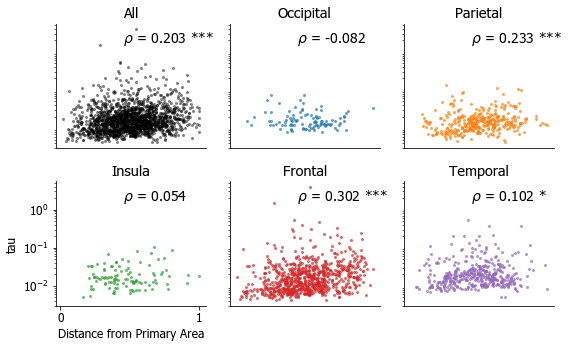

In [15]:
feature = 'tau'
# right hemisphere lobe seeds: V1, S1, insula (BA14), M1, A1 
lobe_seed_coors = np.array([[15, -99, -4], [50, -25, 55], [44, 4, 0], [41, -23, 60], [50, -21, 7]])

# plot distance from seed vs. tau for each electrode
df_w_dist_elec = utils.compute_distance_to_seed(df_combined, lobe_seed_coors, seed_by_lobe=True, norm_by_lobe='max')
plt.figure(figsize=(8,5))
utils.plot_from_seeddist(df_w_dist_elec, 'tau', lobe_id, hold_axis=True)
if save_plot: plt.savefig(fig_path%'mni_tau_distprim',  bbox_inches='tight')

# average over all electrodes of same region in each patient
# df_w_dist_pat = utils.compute_distance_to_seed(patient_reg_agg, lobe_seed_coors, seed_by_lobe=True)
# plt.figure(figsize=(8,5))
# utils.plot_from_seeddist(df_w_dist_pat, 'tau', lobe_id, hold_axis=True)
# if save_plot: plt.savefig(fig_path%'mni_tau_distprim_regavg',  bbox_inches='tight')


# Redo region plot sorted by distance from primary S/M area

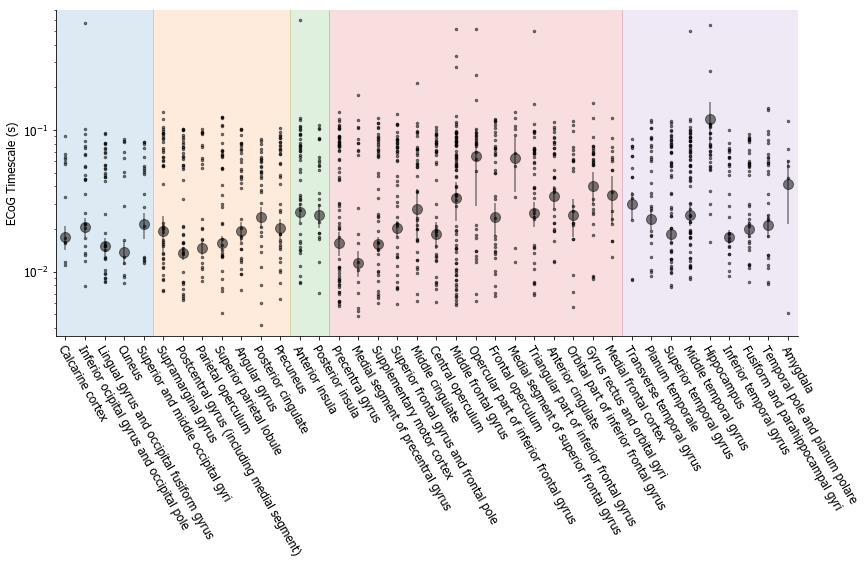

In [16]:
### ---- take average of electrode distance from seed
region_avg_seed_dist = df_w_dist_elec.groupby('region')['seed_dist'].mean()

plt.figure(figsize=(12,8))
utils.plot_agg_by_region(agg_avg, agg_dev, region_labels, patient_reg_agg, sort_by=region_avg_seed_dist, shade_by_lobe=True)
plt.ylim([0.0035, 0.7]); plt.ylabel('ECoG Timescale (s)');
if save_plot: plt.savefig(fig_path%'mni_tau_region_sortbyprim',  bbox_inches='tight')

- data from all electrodes without aggregating show positive correlation between time constant and distance from primary region, especially prominent in parietal and frontal lobe
- when aggregating across regions within patient, the same trends hold
- overall correlation is weak because there's a lobe dependence of distance from seed, i.e. frontal electrodes have quite a lot of electrodes that are 50-100units away from seed, where as the other lobes do not.
    - can mitigate this by normalizing distance from each seed by lobe
    - run function with norm_by_lobe='max'
    - overall correlation is comparable with frontal and parietal correlation
- **above aggregates are computed such that distance is first computed, then averaged. Can also compute distance of 'average electrode' in the region instead of averaging over distance.**

# Subsample by electrode type

1.0 65 ['P', 'b', 10]
4.0 1182 ['^', 'r', 10]
7.0

/Users/rdgao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/rdgao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 256 ['s', 'g', 10]
13.0 262 ['D', 'y', 10]


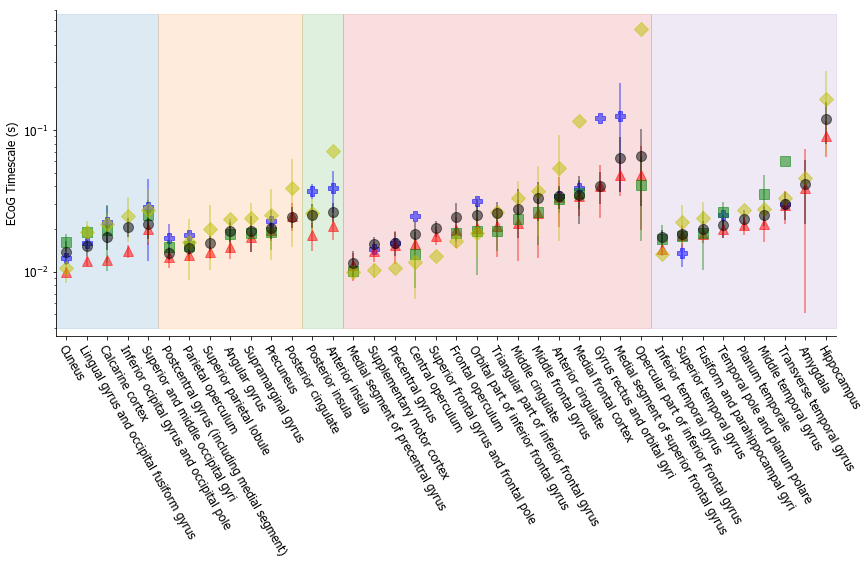

In [17]:
plt.figure(figsize=(12,8))
# iterate through subsets
m_cfgs = [['P','b',10],['^','r',10],['s','g',10],['D','y',10]]
for i,e in enumerate(np.sort(df_combined['etype'].unique())):
    print(e, sum(df_combined['etype']==e), m_cfgs[i])
    elec_agg = df_combined[df_combined['etype']==e].groupby(['region', 'patient']).agg(avg_dev_f[0])
    elec_avg, elec_dev = utils.compute_avg_dev(elec_agg.groupby('region')['tau'], avg_dev_f)
    utils.plot_agg_by_region(elec_avg, elec_dev, region_labels, m_cfg=m_cfgs[i])
    
utils.plot_agg_by_region(agg_avg, agg_dev, region_labels, shade_by_lobe=True)    
plt.ylim([0.0035, 0.7]); plt.ylabel('ECoG Timescale (s)');
if save_plot: plt.savefig(fig_path%'mni_tau_region_electype',  bbox_inches='tight')

- Black circles are grand average, green squares are grid/strip electrodes, the rest (blue/red/yellow) are stereo-EEG.
- It does not look like grid/strip electrodes are significantly different from the rest. Probably should run stats on this.

# Feature vs. Age

/Users/rdgao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/rdgao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


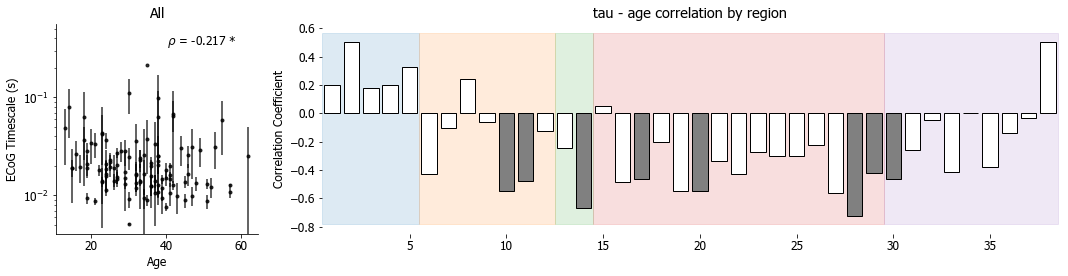

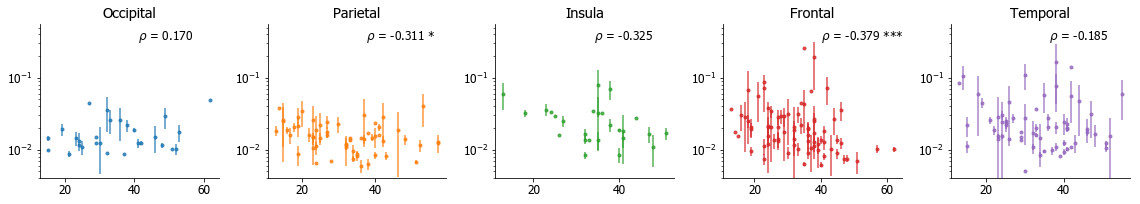

In [18]:
xy_axis_frac = (0.55, 0.9)
avg_dev_f = [np.mean, stats.sem]
sig_thres = 0.05
log_y = True

# ---- grand average over patients ----
patient_agg = df_combined.groupby(['patient'])
patient_age = patient_agg.mean()['age']
rho, pv = stats.spearmanr(patient_age, patient_agg.agg(avg_dev_f[0])['tau'], nan_policy='omit')
s = r'$\rho$ = %.3f '%rho + np.sum(pv<=np.array([0.05, 0.01, 0.001]))*'*'

# plot grand correlation
plt.figure(figsize=(15,4))
plt.subplot2grid((1, 4), (0, 0),colspan=1)
plt.errorbar(patient_age, patient_agg.agg(avg_dev_f[0])['tau'], patient_agg.agg(avg_dev_f[1])['tau']*2, fmt='.k', alpha=0.8)
plt.xlabel('Age'); plt.ylabel('ECoG Timescale (s)'); plt.title('All'); 
plt.annotate(s, xy=xy_axis_frac, xycoords='axes fraction')
utils.remove_spines(plt.gca())
if log_y: plt.yscale('log')
YL_scatter = plt.ylim()

# ---- average per region ----
plt.subplot2grid((1, 4), (0, 1),colspan=4)
for ind, region in enumerate(np.sort(df_combined['region'].unique())):
    sub_reg_agg = df_combined[df_combined['region']==region].groupby('patient').agg(avg_dev_f[0])['tau']
    rho, pv = stats.spearmanr(patient_age.loc[np.array(sub_reg_agg.index).astype(int)], sub_reg_agg, nan_policy='omit')
    plt.bar(region, rho, ec='k', fc='w' if pv > sig_thres else 'gray')

# plot shading for lobe
YL = plt.ylim()
lobe_boundaries = np.sort(np.array([region_labels.groupby('Lobe')['Region #'].min(), region_labels.groupby('Lobe')['Region #'].max()]))
for i,l in enumerate(lobe_boundaries.T):
    plt.fill_between([l[0]-0.5, l[1]+0.5], YL[0], YL[1], alpha=0.15, color=C_ORD[i])
    
plt.xlim([region_labels['Region #'].min()-0.5, region_labels['Region #'].max()+0.5])
plt.ylabel('Correlation Coefficient')
plt.title(feature+' - age correlation by region')
plt.box('off')
plt.tight_layout()
if save_plot: plt.savefig(fig_path%'mni_tau_age',  bbox_inches='tight')
    
    
## correlation for each lobe
plt.figure(figsize=(16,3))
for ind, lobe in enumerate(lobe_id.keys()):
    lobe_avg, lobe_dev = utils.compute_avg_dev(df_combined[df_combined['lobe']==ind].groupby('patient')['tau'], avg_dev_f)
    plt.subplot2grid((1, 5), (0, ind))
    plt.errorbar(patient_age.loc[np.array(lobe_avg.index).astype(int)], lobe_avg, lobe_dev*2, fmt='.', color=C_ORD[ind], alpha=0.8)
    
    rho, pv = stats.spearmanr(patient_age.loc[np.array(lobe_avg.index).astype(int)], lobe_avg, nan_policy='omit')    
    s = r'$\rho$ = %.3f '%rho + np.sum(pv<=np.array([0.05, 0.01, 0.001]))*'*'
    plt.annotate(s, xy=xy_axis_frac, xycoords='axes fraction')
    plt.title(lobe); plt.ylim(YL_scatter); 
    if log_y: plt.yscale('log')
    utils.remove_spines(plt.gca())

plt.tight_layout()
if save_plot: plt.savefig(fig_path%'mni_tau_age_lobe',  bbox_inches='tight')

# Compare with gene expression and T1w/T2w maps

Long term structural/gene expression changes in aging correlates with functional timescales
- PV expression is negatively correlated with timescale; NR2B positively
- PV is increased in primary sensory (visual) cortices; NR2B in association cortices
- PV & NR2 expression both decrease with age
- timescale increases in VC with age, decreases everywhere else, esp frontal

In [7]:
# anat_basepath = '/Users/rdgao/Documents/data/GeneMyelin/'
# # load myelin data
# df_myelin = pd.read_csv(anat_basepath+'Glasser_labels_L.txt', sep='\t', index_col=0, header=None, names=['region'])
# myelin_val = io.loadmat(anat_basepath+'myelin.mat', squeeze_me=True)['myelin']
# df_myelin.insert(loc=1, column='T1T2', value=myelin_val)

# # load gene expression data
# gene_data = io.loadmat(anat_basepath+'gdat.mat', squeeze_me=True)
# df_gene= pd.DataFrame(gene_data['gdat'].T, columns=gene_data['lab'][:,0])

# # combine
# df_anat = pd.concat((df_myelin.reset_index()[['region', 'T1T2']], df_gene), axis=1)
# df_anat.index+=1

- https://www.lead-dbs.org/helpsupport/knowledge-base/atlasesresources/cortical-atlas-parcellations-mni-space/
- https://neurovault.org/collections/1549/
- https://figshare.com/articles/HCP-MMP1_0_projected_on_MNI2009a_GM_volumetric_in_NIfTI_format/3501911
- https://nipy.org/nibabel/gettingstarted.html
- info on sform: https://nifti.nimh.nih.gov/nifti-1/documentation/nifti1fields/nifti1fields_pages/qsform.html
- info on afffines: https://nipy.org/nibabel/nifti_images.html
- **get region from coordinate**: https://neurostars.org/t/get-region-of-brain-from-coordinates/1594
- **vlume to surface mapping**: https://github.com/ThomasYeoLab/CBIG/tree/master/stable_projects/registration/Wu2017_RegistrationFusion

- sform code is 2, but code 4 is MNI?
- get_best_affine() or get_affine() give the same thing, so this seems to be the index to xyz transformation

In [61]:
# import nibabel as nib
# #MMP_data = nib.load(anat_basepath+'MMP 1.0 MNI projections/MMP_in_MNI_corr.nii.gz')
# #MMP_data = nib.load(anat_basepath+'MMP 1.0 MNI projections/HCPMMP1_on_MNI152_ICBM2009a_nlin_hd.nii.gz')
# MMP_data = nib.load(anat_basepath+'MMP 1.0 MNI projections/MMP_in_MNI_symmetrical_1.nii.gz')

# Two possible strategies here:

**Project electrode onto parcellation:**
- first, find the voxels closest to the given coordinate that has non-zero parcellation values, with parameter k-nearest
- second, grab the most common parcellation value to assign to that electrode
- use that parcellation value to find the corresponding expression/T1T2 values

**Project parcellation onto electrode:**
- grab all parcellation values within some k-nearest neighbor voxels
- average the T1T2 (or expression) values over those voxels to assign to the electrode

In [210]:
# # since only <4% of voxels actually have non-zero parcellation values
# # we can reduce the map first and just search in the non-zero regions
# # reduce the map and find the indices where parcel value is non-zero
# MMP_map = np.asarray(MMP_data.get_data())
# MMP_sparse_coords = np.array(np.where(MMP_map>0)).T
# MMP_map_sparse_flat = MMP_map[np.where(MMP_map>0)]

# r_search = 3
# # transform to MMP indices
# ecog_coors_transformed = np.array([utils.apply_affine(MMP_data.affine, row[['x','y','z']].values, False) for r_i, row in df_combined.iterrows()])

# # find the closest projection of ecog onto parcellation voxels within a radius
# proj_dist_inds = utils.project_ecog_mmp(ecog_coors_transformed, MMP_sparse_coords, r_search, find_nearest=False)

In [282]:
proj_method = 'mode'
# assign to parcellation
parcels = np.ones(len(df_combined))*np.nan
for p_i, proj in enumerate(proj_dist_inds):
    if len(proj):
        if proj_method is 'mode':
            # find the mode of the projected parcels and use that value
            parcels[p_i]= stats.mode(MMP_map_sparse_flat[proj[:,1].astype(int)])[0][0]
        elif proj_method is 'closest':
            parcels[p_i]= MMP_map_sparse_flat[proj[0,1].astype(int)]
        
# update parcel column in df
if 'gparcel' in df_combined:
    df_combined['gparcel'] = parcels
else:
    df_combined.insert(10, 'gparcel', parcels)

print('%.3f%% of electrodes of assigned parcels.'%(100.*sum(~np.isnan(df_combined['gparcel']))/len(df_combined)))

90.652% of electrodes of assigned parcels.


# Parcel averaged and electrode-level correlations

/Users/rdgao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/rdgao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


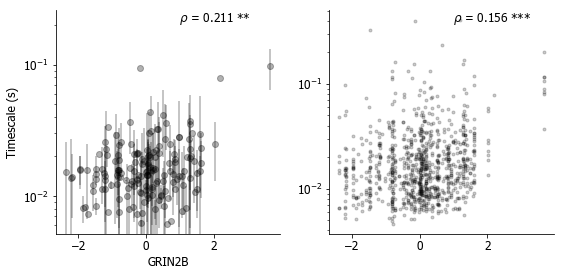

In [288]:
xy_axis_frac = (0.55, 0.95)
label_on_plt=False
anat_feat = 'GRIN2B'
avg_dev_f=[np.median, stats.sem]

# average over parcels within each patient first, then across parcels
# removes confounds of electrode count between diff patients
X = utils.ecog_gene_corr(df_combined, df_anat, avg_dev_f, anat_feat=anat_feat, group_patients=True)
ephys_avg, ephys_dev, anat_avg, corr_agg, ephys_elec, anat_elec, corr_elec = X

# c_grad = plt.cm.plasma((ephys_avg.index)/max(ephys_avg.index)) # color based on parcellation
plt.figure(figsize=(16,8) if label_on_plt else (8,4))
plt.subplot(1,2,1)
plt.errorbar(anat_avg, ephys_avg, yerr=ephys_dev*2, fmt='ok', alpha=0.3)
plt.yscale('log');
plt.xlabel(anat_feat); plt.ylabel('Timescale (s)'); utils.remove_spines(plt.gca())
s = r'$\rho$ = %.3f '%corr_agg[0] + np.sum(corr_agg[1]<=np.array([0.05, 0.01, 0.001]))*'*'
plt.annotate(s, xy=xy_axis_frac, xycoords='axes fraction')

# if label parcel names
if label_on_plt: 
    XR = plt.xlim()[1]-plt.xlim()[0]
    [plt.text(anat_avg[p_i]+XR*0.01, ephys_avg[p_i], df_anat.loc[p_i]['region'][2:-4], fontsize=12) for p_i in anat_avg.index]

plt.subplot(1,2,2)
plt.semilogy(anat_elec, ephys_elec, 'k.', alpha=0.2)
s = r'$\rho$ = %.3f '%corr_elec[0] + np.sum(corr_elec[1]<=np.array([0.05, 0.01, 0.001]))*'*'
plt.annotate(s, xy=xy_axis_frac, xycoords='axes fraction')
utils.remove_spines(plt.gca())
plt.tight_layout()
if save_plot:
    if label_on_plt:
        plt.savefig(fig_path%'mni_corr_tau_%s_parcellabeled'%anat_feat,  bbox_inches='tight')
    else:
        plt.savefig(fig_path%'mni_corr_tau_%s'%anat_feat,  bbox_inches='tight')

# Query all correlations

In [319]:
group_p = True
df_corr = pd.DataFrame(columns=df_anat.columns[1:], index=['all', 'young', 'old'])
df_corr_elec = pd.DataFrame(columns=df_anat.columns[1:], index=['all', 'young', 'old'])
old_subset = df_combined['age']>=df_combined['age'].median()
young_subset = df_combined['age']<df_combined['age'].median()
for anat_feat in df_anat.columns[1:]:
    print(anat_feat, end='|')
    # all
    X = utils.ecog_gene_corr(df_combined, df_anat, avg_dev_f, anat_feat=anat_feat, group_patients=group_p)
    _, _, _,df_corr.loc['all'][anat_feat],_, _,df_corr_elec.loc['all'][anat_feat] = X
    # young-old split
    X = utils.ecog_gene_corr(df_combined, df_anat, avg_dev_f, anat_feat=anat_feat,group_patients=group_p, age_subset=young_subset)
    _, _, _,df_corr.loc['young'][anat_feat],_, _,df_corr_elec.loc['young'][anat_feat] = X
    X = utils.ecog_gene_corr(df_combined, df_anat, avg_dev_f, anat_feat=anat_feat,group_patients=group_p, age_subset=old_subset)
    _, _, _,df_corr.loc['old'][anat_feat],_, _,df_corr_elec.loc['old'][anat_feat] = X

T1T2|

/Users/rdgao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/rdgao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
../utils.py:308: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ephys_avg = df_run[age_subset].groupby('gparcel').agg(avg_dev_func[0])[ephys_feat]
../utils.py:309: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ephys_dev = df_run[age_subset].groupby('gparcel').agg(avg_dev_func[1])[ephys_feat]


ADRA1A|ADRA1B|ADRA1D|ADRA2A|ADRA2B|ADRA2C|ADRB1|ADRB2|ADRB3|DRD1|DRD2|DRD3|DRD4|DRD5|CHRM1|CHRM2|CHRM3|CHRM4|CHRM5|CHRNA10|CHRNA2|CHRNA3|CHRNA4|CHRNA5|CHRNA6|CHRNA7|CHRNA9|CHRNB2|CHRNB3|HTR1A|HTR1B|HTR1D|HTR1E|HTR1F|HTR2A|HTR2B|HTR2C|HTR3A|HTR3B|HTR3C|HTR4|HTR5A|HTR6|HTR7|GRIA1|GRIA2|GRIA3|GRIA4|GRIN1|GRIN2A|GRIN2B|GRIN2C|GRIN2D|GRIN3A|GRIN3B|GRM1|GRM2|GRM3|GRM4|GRM5|GRM6|GRM7|GRM8|GRID1|GRID2|GRIK1|GRIK2|GRIK3|GRIK4|GRIK5|GABRA1|GABRA2|GABRA3|GABRA4|GABRA5|GABRA6|GABRB1|GABRB2|GABRB3|GABRD|GABRE|GABRG1|GABRG2|GABRG3|GABRP|GABRQ|GABRR1|GABRR3|VIP|PV+|SOM|

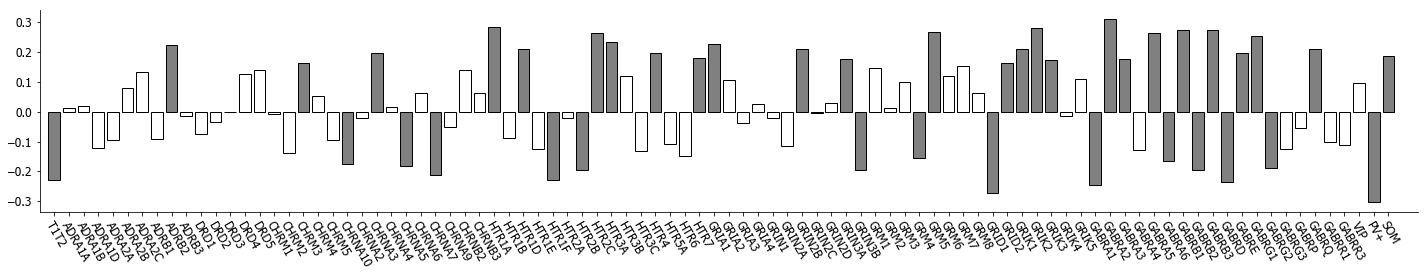

In [320]:
sig_thres = 0.05
plt.figure(figsize=(20,4))
for feat_i, anat_feat in enumerate(df_corr.columns):
    rho, pv = df_corr.loc['all'][anat_feat]
    plt.bar(feat_i,rho, ec='k', fc='w' if pv > sig_thres else 'gray')

plt.xticks(range(len(df_corr.columns)), df_corr.columns, rotation=300, ha='left', rotation_mode='anchor')
plt.xlim([-1,len(df_corr.columns)+1])
utils.remove_spines(plt.gca());plt.tight_layout()
plt.savefig(fig_path%'mni_all_corr',  bbox_inches='tight')

# Young - Old correlation difference

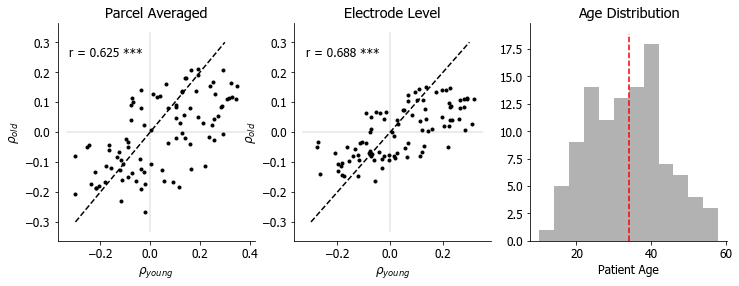

In [321]:
label_on_plt = False
plt.figure(figsize=(18,6) if label_on_plt else (12,4))
plt.subplot(1,3,1)
young_old = np.array([[df_corr.loc['young'][a_f][0],df_corr.loc['old'][a_f][0]] for a_f in df_corr.columns])
plt.plot(young_old[:,0],young_old[:,1], '.k')
plt.plot([-0.3,0.3],[-0.3,0.3], 'k--')
plt.plot(plt.xlim(),[0,0],'k',alpha=0.1);plt.plot([0,0],plt.ylim(),'k',alpha=0.1)
r, pv = stats.pearsonr(young_old[:,0],young_old[:,1])
s = 'r = %.3f '%r + np.sum(pv<=np.array([0.05, 0.01, 0.001]))*'*'
plt.annotate(s, xy=(0.06, 0.85), xycoords='axes fraction')
plt.xlabel(r'$\rho_{young}$');plt.ylabel(r'$\rho_{old}$')
plt.title('Parcel Averaged');utils.remove_spines(plt.gca())

if label_on_plt: 
    XR = plt.xlim()[1]-plt.xlim()[0]
    [plt.text(young_old[af_i,0]+XR*0.01, young_old[af_i,1], af, fontsize=8) for af_i, af in enumerate(df_corr.columns)]


plt.subplot(1,3,2)
young_old = np.array([[df_corr_elec.loc['young'][a_f][0],df_corr_elec.loc['old'][a_f][0]] for a_f in df_corr.columns])
plt.plot(young_old[:,0],young_old[:,1], '.k')
plt.plot([-0.3,0.3],[-0.3,0.3], 'k--')
plt.plot(plt.xlim(),[0,0],'k',alpha=0.1);plt.plot([0,0],plt.ylim(),'k',alpha=0.1)
r, pv = stats.pearsonr(young_old[:,0],young_old[:,1])
s = 'r = %.3f '%r + np.sum(pv<=np.array([0.05, 0.01, 0.001]))*'*'
plt.annotate(s, xy=(0.06, 0.85), xycoords='axes fraction')
plt.xlabel(r'$\rho_{young}$');plt.ylabel(r'$\rho_{old}$')
plt.title('Electrode Level');utils.remove_spines(plt.gca())

plt.subplot(1,3,3)
plt.hist(df_combined.groupby('patient').mean()['age'],bins=np.arange(10,60,4), color='k', alpha=0.3)
plt.plot([df_combined['age'].median()]*2, plt.ylim(), 'r--')
plt.xlabel('Patient Age');plt.title('Age Distribution');utils.remove_spines(plt.gca())

plt.savefig(fig_path%'mni_corr_young_old',  bbox_inches='tight')

This is pretty interesting: the correlation amplitude is in general higher in the older population, i.e., the features that are positively correlated are more positive in the older population. This is really pronounced at the electrode level, but could be due to a few confounds, mainly electrode placement. In other words, it may be that the older population may have a wider coverage of electrodes. Also, the gene expression data is the average of a collection from 6 people in the Allen dataset, which I think are younger people.

In general though, the correlation effects are pretty consistent between the two groups: there aren't any genes that are positively correlated in one group and negative in the other.

**UPDATE**: The above description was for when parcels were averaged directly at the grand level. When parcels are averaged within patients first, and then averaged across patients, the correlation between young and old are less (from 0.85 to 0.68 when averaged within patients first). Also, doing the latter produces a shift and tilt, in that younger patients had slightly more positive correlations overall. 

# Project to MNI coordinates and smooth

In [280]:
elec_ijk = np.zeros((len(df_combined),4))
for r_i, row in df_combined.iterrows():
    i,j,k = apply_affine(MMP_data.affine, row[['x','y','z']].values, False).astype(int)
    elec_ijk[r_i,:] = np.array([row['tau'],i,j,k])

io.savemat('../results/MNI_rest/mni_tau_coor.mat', {'elec_ijk':elec_ijk})

# now go to matlab to do the smoothing


# next steps:
- DONE check projection code from before lol (I fucked up)
- DONE control: median split of age
- DONE do within subj avg and then across subj, instead of directly from elec

- check individual tau distribution, why bimodal
- for hierarchy-distance correlation: use geodesic distance instead of euclidean (should I even bother?)
- project time constants into MNI and do spatial smoothing, then average over parcels and compare correlation that way
- viz show time constants on glasser surface: https://martinos.org/mne/stable/auto_examples/visualization/plot_parcellation.html

- aggregate over glasser coordinates in the glasser clusters: https://github.com/DonnerLab/pymeg/blob/master/pymeg/atlas_glasser.py

- age vs. tau vs. anat features model?
    - predicting gene at diff age based on ecog features?

- **control for spatial AC**